Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

# Phase 2 Project

### Importing Data

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Formatting Cell

In [3]:
pd.set_option('display.max_rows', 1000) #change the amount of rows displayed

In [4]:
df = pd.read_csv('Data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Column Names and descriptions for Kings County Data Set
(source: Data/column_names.md)
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors
D

## Data Cleaning

### Resetting IDs to make them shorter

In [5]:
df = df.reset_index()
df = df.rename(columns={"index":"new_id"})
df

,new_id,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


### Dropping Uncessary Columns

In [6]:
df = df.drop(df[['id', 'date', 'view', 'lat', 'long', 'yr_renovated', 'sqft_living15', 'sqft_lot15']], axis=1)
df.head()

,new_id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode
0,0,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1180,0.0,1955,98178
1,1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,98125
2,2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,98028
3,3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,98136
4,4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,98074


### Checking Data Types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   new_id         21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  zipcode        21597 non-null  int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 2.3+ MB


#### Need to deal with the ? in sqft_basement

In [8]:
basement_size = df['sqft_basement'].value_counts()
basement_size

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
450.0       103
480.0       103
530.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
550.0        76
780.0        76
650.0        75
240.0        74
380.0        73
680.0        73
360.0        72
850.0        72
910.0        71
770.0        71
940.0        71
290.0        69
1200.0       69
440.0        69
880.0        69
350.0        68
520.0        68
630.0        66
920.0        66
730.0        65
960.0        65
740.0        64
430.0        64
760.0        63
640.0        63
1010.0       63
820.0        62
950.0        62
570.0        62
340.0        62
560.0        62
280.0        62
790.0        61
460.0        61
1060.0       58
310.0        58
980.0        57
830.0        56
1040.0       55
810.0   

In [9]:
unknown_basements = df[df['sqft_basement'] == '?']
known_basements = df[df['sqft_basement'] != '?']

print(len(unknown_basements))
print(len(known_basements))

454
21143


In [10]:
#unknown_basements = unknown_basements[['id', 'sqft_living', 'sqft_above' ]]
#unknown_basements

In [11]:
sqft_basement = unknown_basements.apply(lambda x: x['sqft_living'] - x['sqft_above'], axis=1)
unknown_basements['sqft_basement'] = sqft_basement
unknown_basements.head()

<ipython-input-11-1aa7a46566a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_basements['sqft_basement'] = sqft_basement


,new_id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode
6,6,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1715,0,1995,98003
18,18,189000.0,2,1.00,1200,9850,1.0,0.0,4,7,1200,0,1921,98002
42,42,861990.0,5,2.75,3595,5639,2.0,0.0,3,9,3595,0,2014,98053
79,79,720000.0,4,2.50,3450,39683,2.0,0.0,3,10,3450,0,2002,98010
112,112,272500.0,3,1.75,1540,12600,1.0,0.0,4,7,1160,380,1980,98038


In [12]:
df = known_basements.append(unknown_basements)
df.head()

,new_id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode
0,0,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1180,0.0,1955,98178
1,1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,98125
2,2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,98028
3,3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,98136
4,4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,98074


In [13]:
#changing to float so that decminals are in the same format
df['sqft_basement'] = df['sqft_basement'].astype(float)
df['sqft_above'] = df['sqft_above'].astype(float)

In [14]:
df['sqft_basement'].value_counts().head()

0.0      13110
600.0      221
700.0      218
500.0      214
800.0      206
Name: sqft_basement, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21581
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   new_id         21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21597 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  zipcode        21597 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 2.5 MB


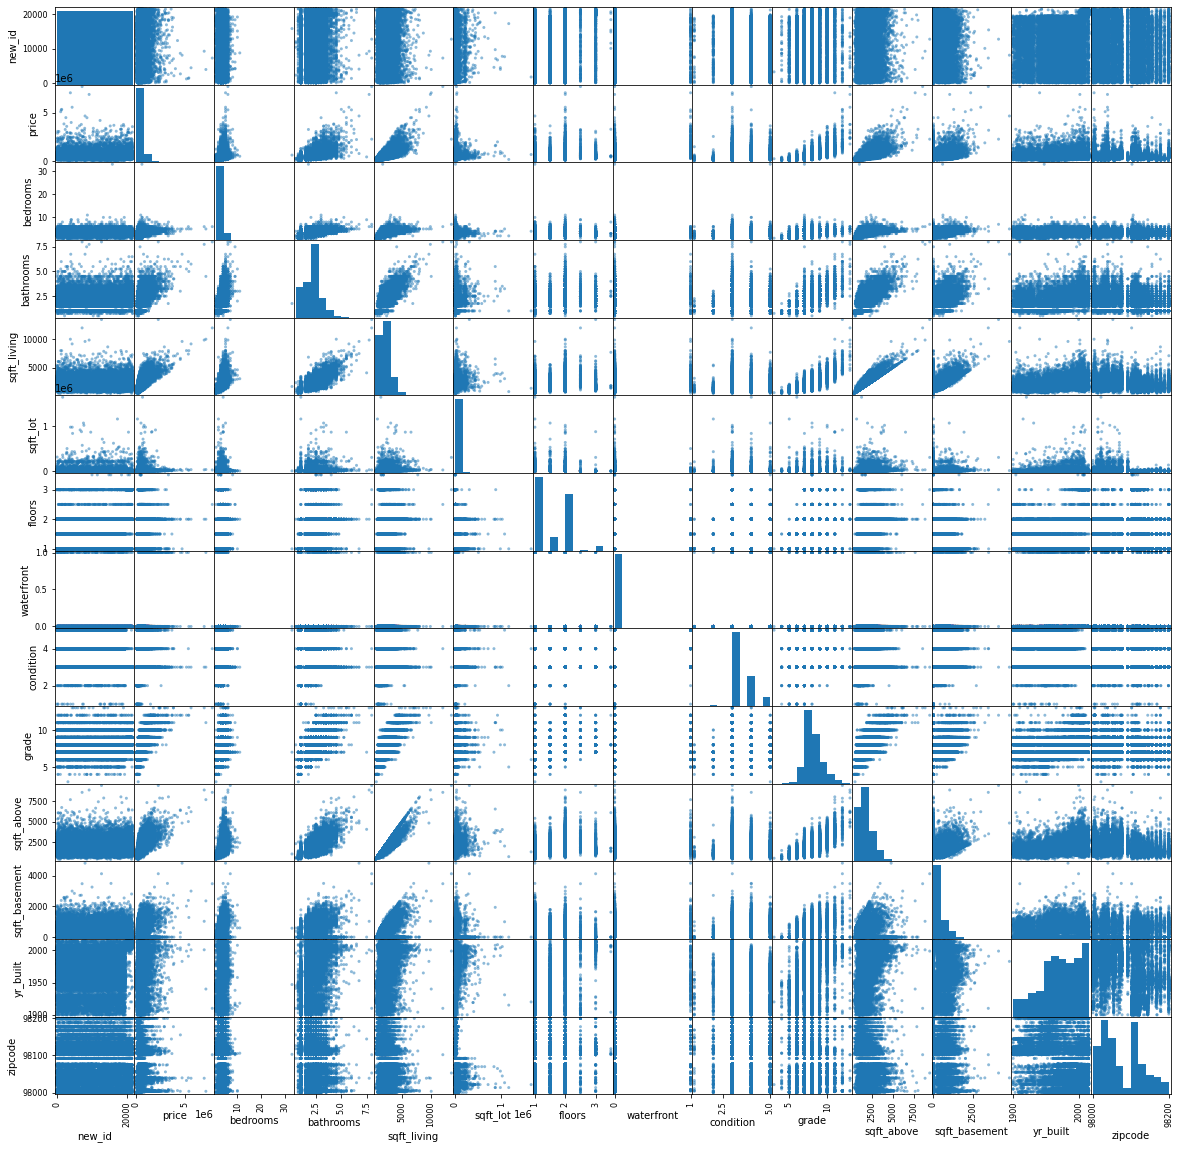

In [16]:
#using scatter plot to look for linear relationships
pd.plotting.scatter_matrix(df, figsize = [20,20]);
plt.show()

## Checking for Null Values

In [17]:
df.isna().sum()

new_id              0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
dtype: int64

### Fixing Waterfront

In [18]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [19]:
df['waterfront'] = df['waterfront'].astype('bool') #converting waterfront into boolean

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21581
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   new_id         21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  bool   
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21597 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  zipcode        21597 non-null  int64  
dtypes: bool(1), float64(5), int64(8)
memory usage: 2.3 MB


### More Cleaning

### Building Condition Explaination
https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#d (accessed 12/6/2021)

Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.


In [21]:
df['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

### Building Grade Explaination
https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#d (accessed 12/6/2021)


Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

In [22]:
df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

I am only concerned with houses that currently meet the building code, so I will drop the houses which are grade 5 or lower

In [23]:
low_grade = df[df['grade'] <= 5]
low_grade.head()

,new_id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode
36,36,550000.0,4,1.00,1660,34848,1.0,False,1,5,930.0,730.0,1933,98052
166,166,269950.0,2,1.75,1340,7250,1.0,False,5,5,700.0,640.0,1949,98198
263,263,425000.0,2,1.00,770,5040,1.0,False,3,5,770.0,0.0,1930,98144
264,264,369900.0,1,0.75,760,10079,1.0,True,5,5,760.0,0.0,1936,98070
350,350,299000.0,1,0.75,560,12120,1.0,True,3,4,560.0,0.0,1967,98014


In [24]:
low_grade['condition'].value_counts()

3    112
4     94
5     35
2     19
1     10
Name: condition, dtype: int64

In [25]:
low_grade['waterfront'].value_counts()

False    234
True      36
Name: waterfront, dtype: int64

In [26]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [27]:
#dropping outliers
df = df.sort_values('bedrooms', ascending=False).reset_index()
df = df.drop([0,1,2,3,4])
df.head(5)

,index,new_id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode
5,8537,8537,450000.0,9,7.5,4050,6504,2.0,False,3,7,4050.0,0.0,1996,98144
6,18428,18428,934000.0,9,3.0,2820,4480,2.0,False,3,7,1880.0,940.0,1918,98105
7,4231,4231,700000.0,9,3.0,3680,4400,2.0,False,3,7,2830.0,850.0,1908,98102
8,16830,16830,1400000.0,9,4.0,4620,5508,2.5,False,3,11,3870.0,750.0,1915,98105
9,6073,6073,1280000.0,9,4.5,3650,5000,2.0,False,3,8,2530.0,1120.0,1915,98105


### Normalizing Data

In [28]:
def norm_feat(series):
    return (series - series.mean())/series.std()

In [29]:
data = norm_feat(df)
data

,index,new_id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode
5,-0.362499,-0.362499,-0.245666,6.259687,7.004289,2.146005,-0.207575,0.937440,-0.363653,-0.629883,-0.560807,2.732015,-0.658895,0.850984,1.234171
6,1.223890,1.223890,1.071753,6.259687,1.150447,0.806063,-0.256443,0.937440,-0.363653,-0.629883,-0.560807,0.110525,1.465376,-1.804597,0.505386
7,-1.053126,-1.053126,0.434819,6.259687,1.150447,1.742933,-0.258375,0.937440,-0.363653,-0.629883,-0.560807,1.258182,1.261988,-2.145056,0.449326
8,0.967591,0.967591,2.340178,6.259687,2.451301,2.766954,-0.231623,1.863895,-0.363653,-0.629883,2.848481,2.514564,1.036002,-1.906735,0.505386
9,-0.757693,-0.757693,2.013545,6.259687,3.101728,1.710251,-0.243888,0.937440,-0.363653,-0.629883,0.291515,0.895764,1.872152,-1.906735,0.505386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0.224518,0.224518,-0.852659,-2.635948,-0.150407,-1.013208,-0.127704,-0.915471,-0.363653,0.907410,-0.560807,-0.771359,-0.658895,-0.306577,-1.438040
21593,1.349312,1.349312,-0.926424,-2.635948,-1.451260,-1.481643,-0.192219,-0.915471,-0.363653,-0.629883,-1.413128,-1.290825,-0.658895,-1.396046,1.271545
21594,-1.067401,-1.067401,-0.570666,-2.635948,-1.451260,-1.634157,-0.321175,-0.915471,-0.363653,-0.629883,-0.560807,-1.459953,-0.658895,-2.145056,0.729628
21595,-1.301085,-1.301085,-0.422062,-2.635948,-1.451260,-1.492537,-0.219743,0.010984,-0.363653,-0.629883,-1.413128,-1.302905,-0.658895,1.497856,1.234171


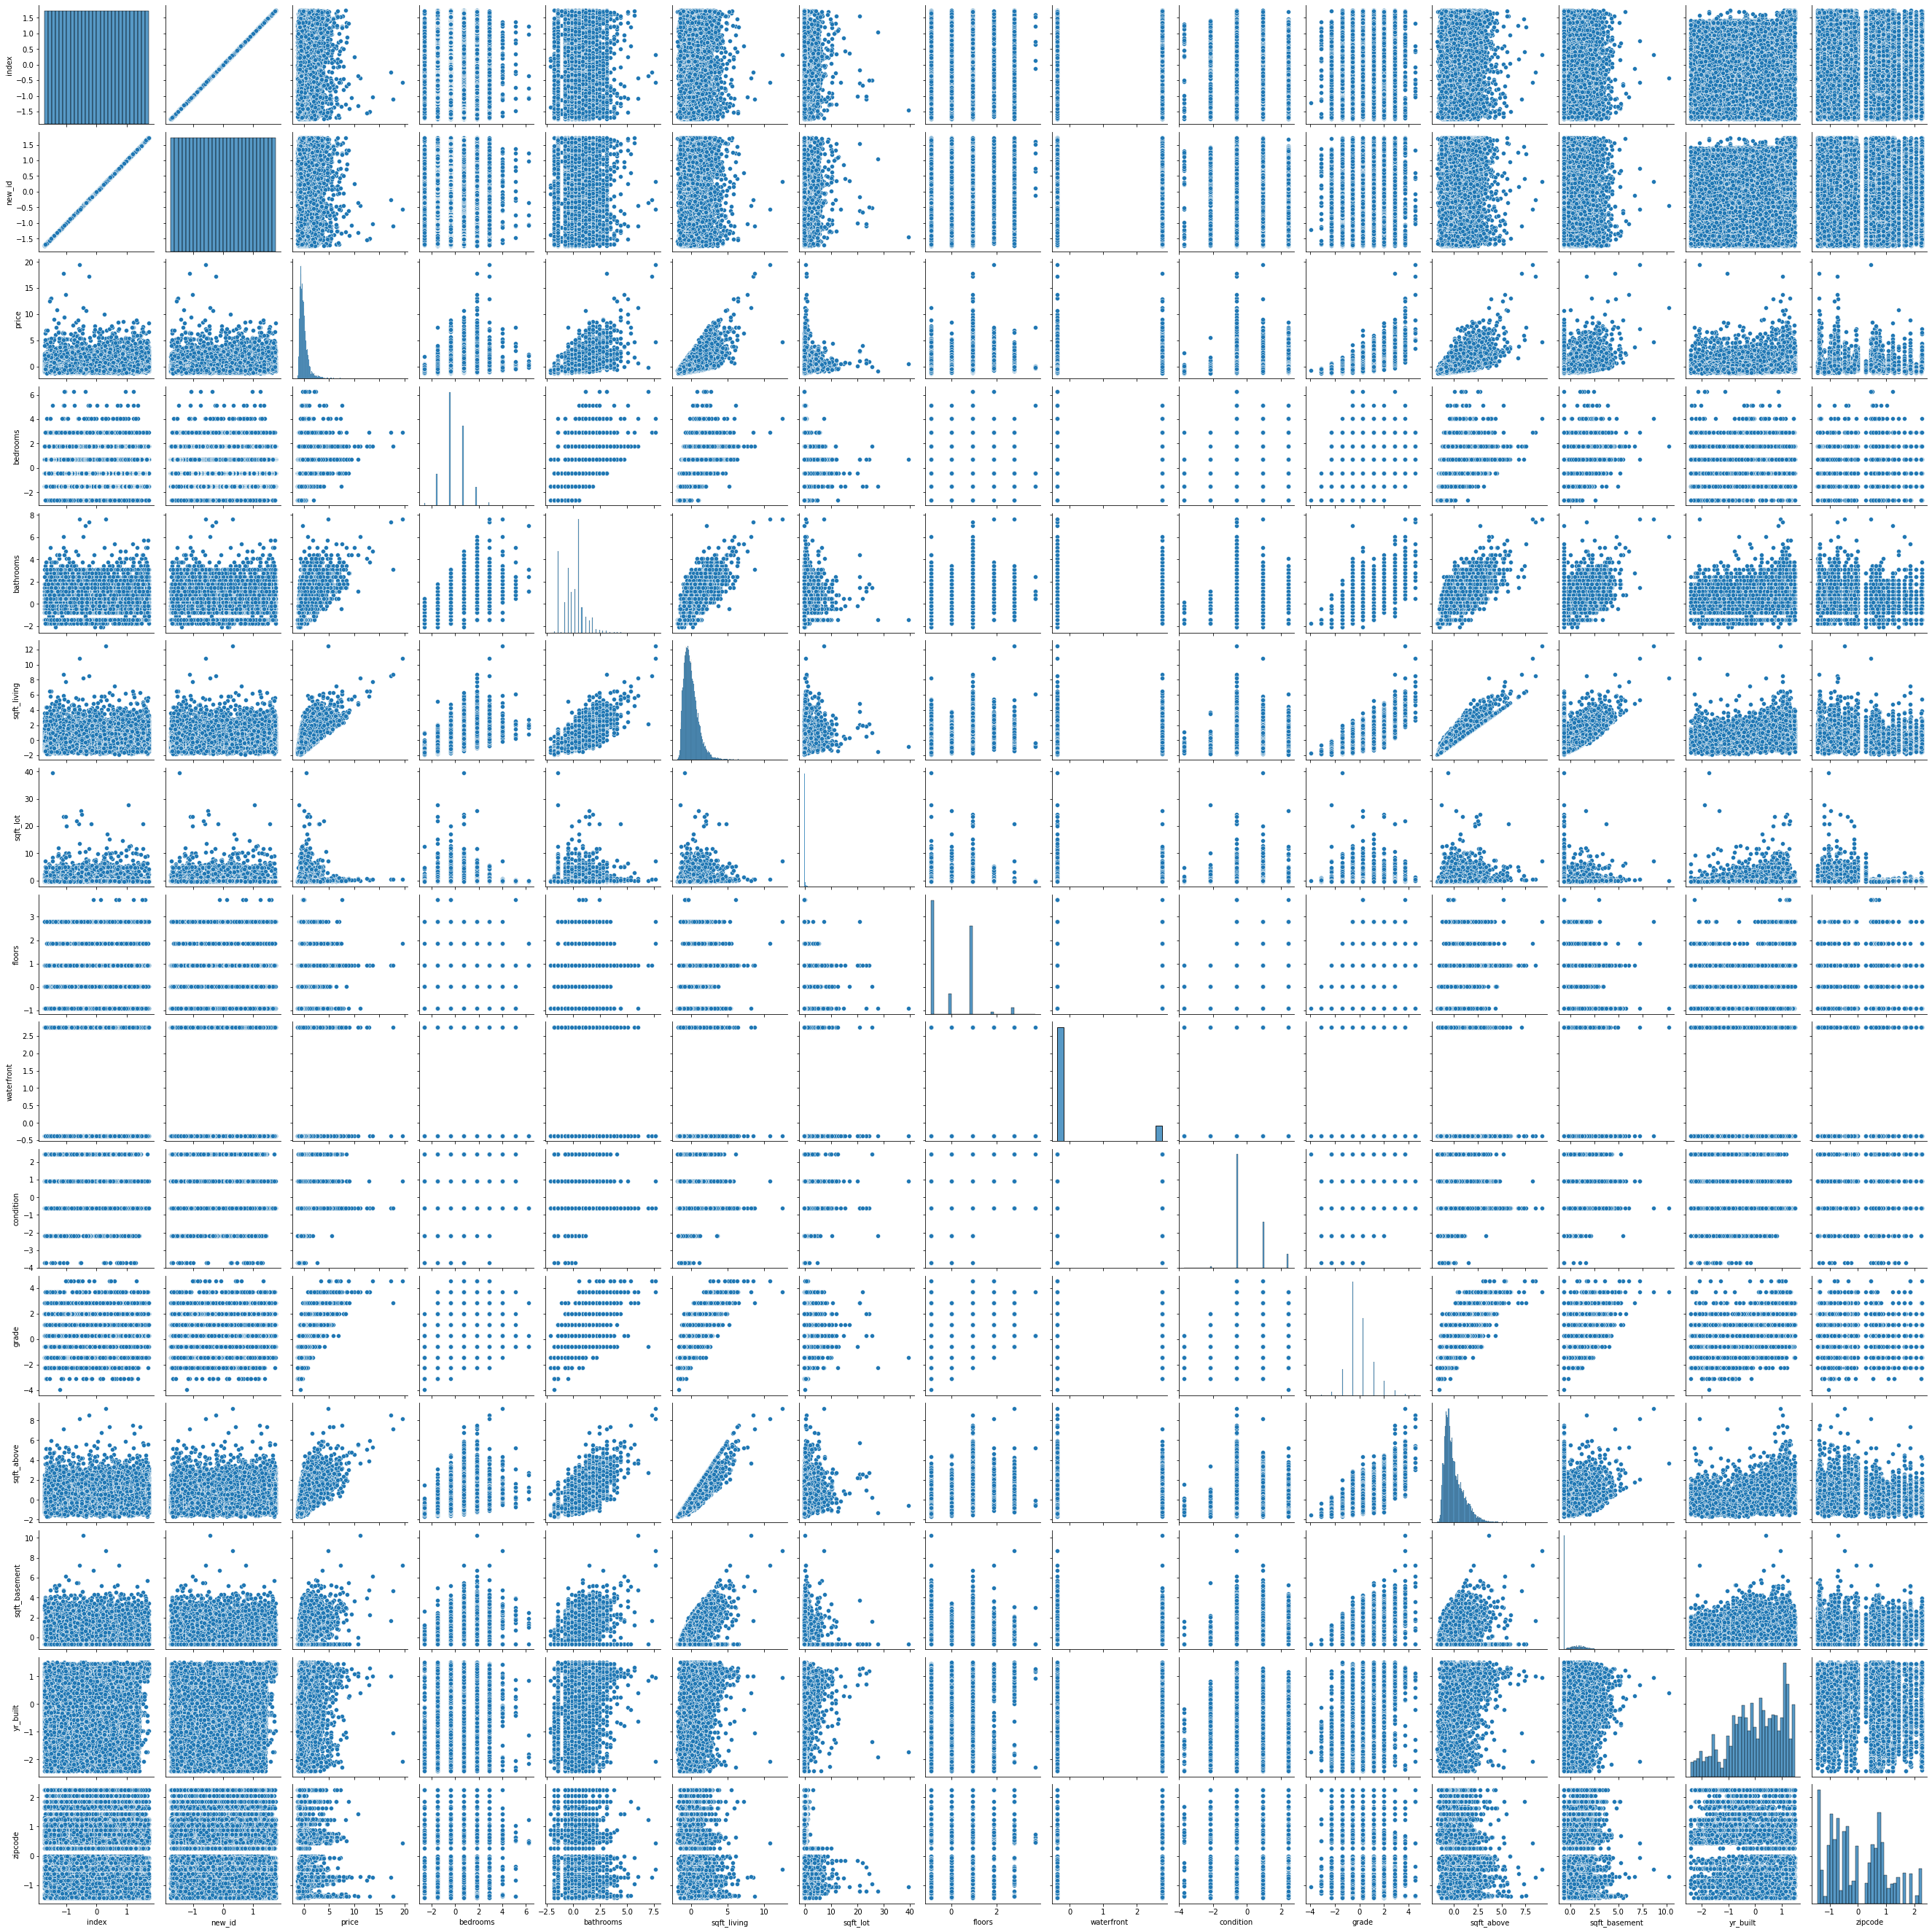

In [36]:
sns.pairplot(data)

In [39]:
sns.heatmap(data, annot=True);

Error in callback <function flush_figures at 0x7fac6b2230d0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
#feat = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
#            'condition', 'grade', 'sqft_above', 'sqft_basement']]

In [ ]:
#df_feat = norm_feat(feat)
#df_feat.describe()

In [ ]:
for feat in ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
            'condition', 'grade', 'sqft_above', 'sqft_basement']:
    df[feat] = norm_feat(df[feat])
df.describe()

In [ ]:
data_pred = df

## Plotting Categoricals and then One-Hot Encoding them

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10), sharey=True)

categoricals = df[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade']]

for col, ax in zip(categoricals, axes.flatten()):
    (df.groupby(col)               # group values together by column of interest
         .mean()['price']        # take the mean of the saleprice for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)                # Make the title the name of the column
    
fig.tight_layout()


In [ ]:
sns.heatmap(categoricals)

In [ ]:
#correlation matrix. 
df.corr()

In [ ]:
df_pred_222 = abs(df.corr() > 0.75)

### Another attempt at correlation matrix using notes

In [ ]:
df = df_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df['pairs'] = list(zip(df.level_0), df.level_1)
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace=True)
df.columns = ['cc']

In [ ]:
#df_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

In [ ]:
df['pairs'] = list(zip(df.level_0), df.level_1)

In [40]:
df.head(1)

,index,new_id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode
5,8537,8537,450000.0,9,7.5,4050,6504,2.0,False,3,7,4050.0,0.0,1996,98144


### One Hot Encoding

In [43]:
feats = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade', 'zipcode' ]
feats_df = df[feats]
encoded_df = pd.get_dummies(feats_df, drop_first=True)
encoded_df.head()

,bedrooms,bathrooms,floors,waterfront,condition,grade,zipcode
5,9,7.5,2.0,False,3,7,98144
6,9,3.0,2.0,False,3,7,98105
7,9,3.0,2.0,False,3,7,98102
8,9,4.0,2.5,False,3,11,98105
9,9,4.5,2.0,False,3,8,98105
